# Introduction to Artificial Neural Networks

**OBJECTIVES**

- Understand connections between linear models and neural networks
- Use `pytorch` to build basic multilayer perceptron models for regression and classification

**NEXT CLASS!!!**


NYU faculty, administrators, staff, and students may apply for a WRDS account. Non-PhD students can request a temporary Research Assistant account when working with faculty.

- Visit [Wharton Research Database Services](https://wrds-www.wharton.upenn.edu/)

- Click the Register button.

- Complete the form, read the Terms of Use, and submit.

- The NYU Representative for WRDS will review your application and affiliation.

- Upon approval, WRDS will email instructions for setting your password.

In [403]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

Please use the form [here](https://forms.gle/EgQFNhVbG2CG2zca6) to discuss your time series problem and final project ideas.

In [404]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Linear Models Revisited

Recall our logistic regression model.  We can think about this model as a linear function composed into the sigmoid function.

$$l(x) = \beta_0 + \beta_1 X$$
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

$$\text{Logistic Model} = \sigma(l(x))$$

![](images/linear_sep.png)

We also understodd the quality of the model minimizing a loss function -- log loss.  This is also called **binary cross entropy**, and the "best" model was the one whose parameters minimized the log loss or BCE.  Together, we have two important ideas -- a linear function and the goal of minimizing a loss function.  

Linear regression is a similar algorithm with a different loss function -- Mean Squared Error.

### Minimizing Functions

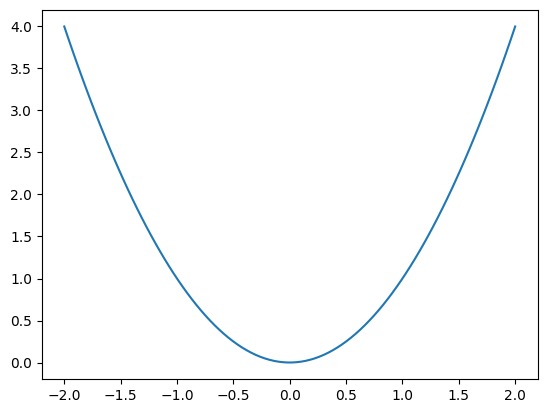

In [405]:
x = torch.linspace(-2, 2, 100)
def f(x): return x**2
plt.plot(x, f(x));

In [406]:
def df(x): return 2*x

In [407]:
def tan_line(x, a): return df(a)*(x - a) + f(a)

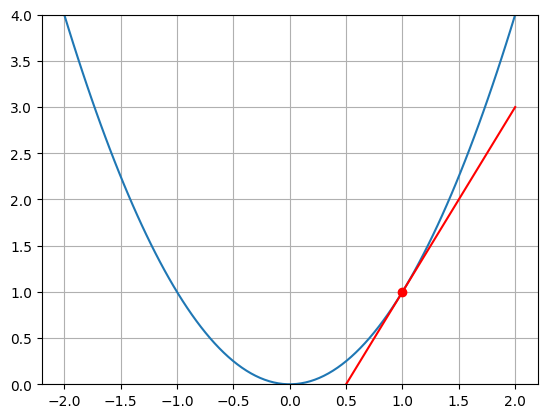

In [408]:
plt.plot(x, f(x))
plt.plot(x, tan_line(x, 1), 'r')
plt.plot(1, f(1), 'ro')
plt.ylim(0, 4)
plt.grid();

$$x_{n + 1} = x_n - \text{step size} * f'(x_n)$$

In [409]:
x0 = 1
step_size = 0.1

In [410]:
x1 = x0 - step_size*df(x0)

In [411]:
x1

0.8

In [412]:
x2 = x1 - step_size*df(x1)
x2

0.64

In [413]:
xs = [x0]
for i in range(100):
    xnext = xs[-1] - step_size*df(xs[-1])
    xs.append(xnext)
xs = np.array(xs)

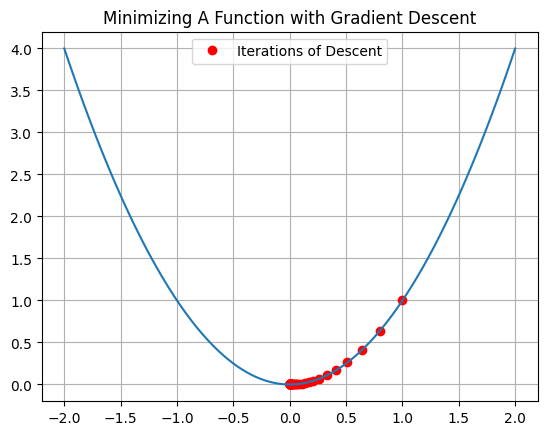

In [414]:
plt.plot(xs, f(xs), 'ro', label = 'Iterations of Descent')
plt.plot(x, f(x))
plt.grid()
plt.title('Minimizing A Function with Gradient Descent')
plt.legend();

#### `nn.Linear`

This layer performs a linear operation on its input using randomly initialized weights.

In [415]:
linear = nn.Linear(in_features=1, out_features = 1)

In [416]:
list(linear.parameters()) #slope and intercept/bias

[Parameter containing:
 tensor([[-0.1917]], requires_grad=True),
 Parameter containing:
 tensor([0.6534], requires_grad=True)]

In [421]:
linear(torch.tensor([5.]))

tensor([-0.3048], grad_fn=<ViewBackward0>)

### A Visual Example

- [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.79501&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [303]:
from sklearn.datasets import load_breast_cancer

In [424]:
cancer = load_breast_cancer()
X, Y = cancer.data, cancer.target

In [425]:
l1 = nn.Linear(in_features=30, out_features = 1)

In [426]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.float32)

In [427]:
l1(X)

tensor([[385.6059],
        [425.1644],
        [381.2654],
        [123.1488],
        [380.3270],
        [155.7974],
        [340.3042],
        [191.4602],
        [162.7812],
        [153.5927],
        [252.9365],
        [266.2387],
        [329.4026],
        [220.5488],
        [166.8834],
        [208.0313],
        [233.6949],
        [271.0690],
        [466.2239],
        [166.1907],
        [149.5128],
        [ 77.3162],
        [218.0750],
        [511.1205],
        [389.4114],
        [308.9959],
        [198.7623],
        [331.0209],
        [254.9189],
        [285.9835],
        [360.2159],
        [167.4129],
        [292.0126],
        [384.0669],
        [264.4366],
        [272.3440],
        [186.9859],
        [141.8659],
        [195.4436],
        [168.5011],
        [175.0093],
        [115.1450],
        [359.5890],
        [185.4277],
        [164.1520],
        [342.8755],
        [ 58.5466],
        [167.1497],
        [133.8530],
        [165.1459],


In [428]:
output_activation = nn.Sigmoid()

In [429]:
yhat = output_activation(l1(X))

In [430]:
yhat.shape

torch.Size([569, 1])

In [431]:
loss = nn.BCELoss()

In [432]:
loss(Y.unsqueeze(-1), yhat)

tensor(37.2583, grad_fn=<BinaryCrossEntropyBackward0>)

### Training the Model

*Ingredients*:

- Model: We will build this with either `nn.Sequential` or by subclassing the `nn.Module`.
- Loss Function: Depending on the task this will be different
    -   Regression is `nn.MSELoss`
    -   Binary classification is `nn.BCELoss`
    -   Multi-class classification is `nn.CrossEntropyLoss`
- Optimizer: Function to minimize the loss -- today we will use `optim.SGD`

In [344]:
model = nn.Sequential(nn.Linear(30, 100),
                      nn.ReLU(),
                      nn.Linear(100, 1),
                      nn.Sigmoid())

In [345]:
loss_fn = nn.BCELoss()

In [346]:
optimizer = optim.SGD(model.parameters(), lr = 0.05)

In [347]:
yhat = model(X)

In [349]:
loss = loss_fn(yhat, Y.unsqueeze(-1))

In [350]:
optimizer.zero_grad()

In [351]:
loss.backward()

In [352]:
optimizer.step()

In [353]:
X.shape

torch.Size([569, 30])

In [354]:
X = (X - X.mean())/X.std()

In [355]:
losses = []
for epoch in range(1000):
    yhat = model(X)
    loss = loss_fn(yhat, Y.unsqueeze(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

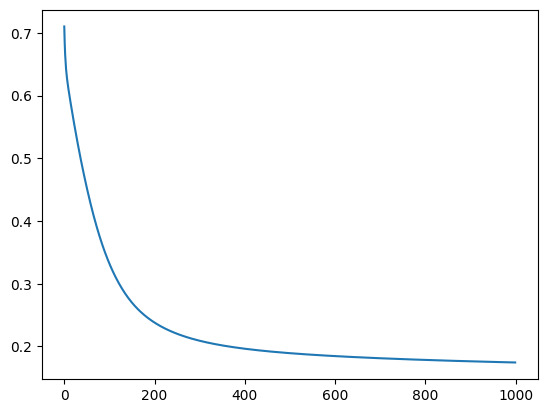

In [356]:
plt.plot(losses)

### Making Predictions

The model returns probabilites that we need to use in order to make predictions.

In [357]:
yhat = model(X)

In [358]:
preds = torch.where(yhat > .5, 1, 0)

In [360]:
(preds.squeeze(-1) == Y).sum()/len(Y)

tensor(0.9227)

#### Example: Handwritten Digits

Below, the handwritten digits data is loaded and transformed to `torch.tensor` objects.  Recall these are 8 x 8 images of handwritten digits, and there are ten categories to predict.

In [366]:
from sklearn.datasets import load_digits

In [367]:
digits = load_digits()

In [368]:
X, y = digits.data, digits.target

In [369]:
X = (X - X.mean())/X.std()

In [370]:
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(y, dtype = torch.float32)

In [371]:
X.shape

torch.Size([1797, 64])

#### Problem

Below, build a model with the following:

- A Linear layer with 100 neurons
- A ReLU activation on this layer
- A Linear layer with another 100 neurons
- A ReLU activation on this layer
- A Linear output layer with 10 neurons

Use the `optim.SGD` to optimize the parameters of the model.

Use `nn.CrossEntropyLoss` as your loss function for multiclass classification.

In [372]:
model = ''

In [373]:
optimizer = ''

In [374]:
loss_fn = ''

In [375]:
from tqdm import tqdm

In [376]:
def train_function(model, X, Y, epochs, optimizer, loss_fn, losses = []):
    '''
    The function trains a pytorch model given a model,
    number of training epochs, optimizer, and loss function.
    It returns a list of losses from training.
    '''
    for epoch in tqdm(range(epochs)):
        yhat = model(X)
        loss = loss_fn(yhat, Y.unsqueeze(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

In [377]:
train_function(model, X, Y, epochs = 1000, optimizer = optimizer, loss_fn = loss_fn)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]


TypeError: 'str' object is not callable

In [ ]:
yhat = model(X)
predictions = torch.argmax(yhat)
sum(predictions == Y)/len(Y)